<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selenium-사용하기" data-toc-modified-id="Selenium-사용하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selenium 사용하기</a></span><ul class="toc-item"><li><span><a href="#네이버-로그인" data-toc-modified-id="네이버-로그인-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>네이버 로그인</a></span></li><li><span><a href="#네이버-메일-크롤링" data-toc-modified-id="네이버-메일-크롤링-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>네이버 메일 크롤링</a></span></li></ul></li><li><span><a href="#서울시-구별-주유소-가격-정보-얻기" data-toc-modified-id="서울시-구별-주유소-가격-정보-얻기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>서울시 구별 주유소 가격 정보 얻기</a></span><ul class="toc-item"><li><span><a href="#서울시-구-list-얻기" data-toc-modified-id="서울시-구-list-얻기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>서울시 구 list 얻기</a></span></li><li><span><a href="#구-설정,-조회,-엑셀다운-test" data-toc-modified-id="구-설정,-조회,-엑셀다운-test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>구 설정, 조회, 엑셀다운 test</a></span></li><li><span><a href="#반복문을-통한-25개-구-주유소-가격-정보-수집" data-toc-modified-id="반복문을-통한-25개-구-주유소-가격-정보-수집-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>반복문을 통한 25개 구 주유소 가격 정보 수집</a></span></li></ul></li><li><span><a href="#구별-주유-가격에-대한-데이터-정리" data-toc-modified-id="구별-주유-가격에-대한-데이터-정리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>구별 주유 가격에 대한 데이터 정리</a></span></li><li><span><a href="#셀프-주유소는-정말-저렴한지-boxplot으로-확인-(휘발류-한정)" data-toc-modified-id="셀프-주유소는-정말-저렴한지-boxplot으로-확인-(휘발류-한정)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>셀프 주유소는 정말 저렴한지 boxplot으로 확인 (휘발류 한정)</a></span></li><li><span><a href="#서울시-구별-주유-가격-확인하기" data-toc-modified-id="서울시-구별-주유-가격-확인하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>서울시 구별 주유 가격 확인하기</a></span></li><li><span><a href="#서울시-주유-가격-상하위-10개-주유소-지도에-표기" data-toc-modified-id="서울시-주유-가격-상하위-10개-주유소-지도에-표기-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>서울시 주유 가격 상하위 10개 주유소 지도에 표기</a></span><ul class="toc-item"><li><span><a href="#상하위-데이터-나누기" data-toc-modified-id="상하위-데이터-나누기-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>상하위 데이터 나누기</a></span></li><li><span><a href="#google-map-api로-위도-경도-얻기" data-toc-modified-id="google-map-api로-위도-경도-얻기-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>google map api로 위도 경도 얻기</a></span></li></ul></li></ul></div>

# Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('./driver/chromedriver.exe')
driver.get('http://naver.com')

In [4]:
# 화면 캡쳐
driver.save_screenshot('001.jpg')

True

## 네이버 로그인

In [5]:
# 로그인 버튼 클릭해서, 로그인 페이지로 넘어가기
xpath = """//*[@id="account"]/a"""   # 개발자도구 -> 로그인 클릭 -> 하이라이터 된 부분 copy-> copyxpath 해서 복붙
driver.find_element_by_xpath(xpath).click()

In [7]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()   # 글자가 입력되어있을 수도 있으니, clear한번 해주기
elem_login.send_keys("***")

In [8]:
elem_login = driver.find_element_by_id("pw")
elem_login.clear() 
elem_login.send_keys("***")

In [9]:
# 로그인 버튼 클릭
xpath = """//*[@id="log.login"]"""   
driver.find_element_by_xpath(xpath).click()

## 네이버 메일 크롤링

In [10]:
# 메일함 접속
driver.get('http://mail.naver.com')

In [11]:
# 원하는 곳으로 이동했으니, beautifulSoup으로 페이지 내용 읽어오기
from bs4 import BeautifulSoup

html = driver.page_source     # driver.page_source: 현재 selenium이 접근한 페이지의 소스를 넘겨받음
soup = BeautifulSoup(html, 'html.parser')

In [1]:
# soup

In [2]:
# # 메일 보낸사람 나타내는 곳의 tag
# raw_list = soup.find_all('div','name _ccr(lst.from)')
# raw_list

In [20]:
raw_list[0]

<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|14097) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>

In [22]:
raw_list[10]

<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|14081) _stopDefault" href="#" title='"사람인 | 기업연구소" &lt;favorcompany@mailinfo.saramin.co.kr&gt;'>사람인 | 기업연구소</a></div>

In [23]:
# a tag의 text만 가져오기
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['네이버',
 '네이버',
 '사람인 | 기업연구소',
 '사람인 | 기업연구소',
 '사람인 | 기업연구소',
 '옥션',
 'Agoda Deals',
 'Freepik Company Te..',
 '사람인 | 기업연구소',
 'BGF네트웍스',
 '사람인 | 기업연구소',
 '오늘의집',
 '사람인 | 기업연구소',
 '국세청',
 '[엠브레인]']

In [24]:
# 크롬 드라이버 닫기
driver.close()

# 서울시 구별 주유소 가격 정보 얻기
- opinet: http://www.opinet.co.kr/searRgSelect.do

## 서울시 구 list 얻기

In [26]:
driver = webdriver.Chrome('./driver/chromedriver.exe')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [27]:
# 구 설정하는 곳 클릭  # 25구 변경해가면서 크롤링 해야하니까
# option tag 찾으면됨
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")   # xpath copy
gu_list = gu_list_raw.find_elements_by_tag_name("option")    # element"s": element는 하나만, elements는 찾은 것 모두 list로 반환

In [30]:
gu_list

[<selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="b6cf8486-c433-45c8-9640-fe785d076ee2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="fbe65ee7-fb54-4dea-bae9-8e7088b6ff27")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="d30db4cc-3b75-4572-9711-6afbfcaa1335")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="7e04ee77-f4e0-4836-9527-040ca340bc40")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="aee7f0f1-4b36-456a-a95b-2901fc37399a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="97030ea2-ff78-4c4e-a23a-1133ca5ebe92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e9f4d3d419c89dd1e5a4cf04a303b346", element="8553293b-9245-4840-965d-e8

In [29]:
# 구 이름 list 
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

## 구 설정, 조회, 엑셀다운 test

In [31]:
# 구 list 중 첫번째 것으로 구 설정해보기
element = driver.find_element_by_id("SIGUNGU_NM0")  # 구선택하는 곳 이름
element.send_keys(gu_names[0])   # 강남구

In [32]:
# 조회 버튼 클릭 (xpath copy)
xpath = """//*[@id="searRgSelect"]/span"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [34]:
# 조회된 결과 엑셀 저장하는 "엑셀 저장" 버튼 클릭 (xpath copy)
xpath = """//*[@id="glopopd_excel"]/span"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

## 반복문을 통한 25개 구 주유소 가격 정보 수집

In [36]:
import time
from tqdm.notebook import tqdm

for gu in tqdm(gu_names):
    # 구 설정
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    # 조회 버튼 클릭
    xpath = """//*[@id="searRgSelect"]/span"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(2)
    
    # 조회 결과 저장
    xpath = """//*[@id="glopopd_excel"]/span"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(2)

In [37]:
# 크롬 드라이버 닫기
driver.close()

# 구별 주유 가격에 대한 데이터 정리

In [38]:
import pandas as pd
from glob import glob

In [39]:
# glob를 통해 "지역*.xls" - 지역이 들어가는 엑셀 파일 모두 찾을 수 있음 0~24(25개)
glob('data/04_구별 주유소 가격/지역*.xls')

['data/04_구별 주유소 가격\\지역_위치별(주유소) (1).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (10).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (11).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (12).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (13).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (14).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (15).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (16).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (17).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (18).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (19).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (2).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (20).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (21).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (22).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (23).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (24).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (3).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (4).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (5).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (6).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (7).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (8).xl

In [40]:
stations_files = glob('data/04_구별 주유소 가격/지역*.xls')
stations_files

['data/04_구별 주유소 가격\\지역_위치별(주유소) (1).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (10).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (11).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (12).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (13).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (14).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (15).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (16).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (17).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (18).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (19).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (2).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (20).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (21).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (22).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (23).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (24).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (3).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (4).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (5).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (6).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (7).xls',
 'data/04_구별 주유소 가격\\지역_위치별(주유소) (8).xl

In [49]:
# 순차적으로 25개 파일 읽기 -> tmp_raw에 append 반복 => concat으로 하나로 합치기
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [50]:
tmp_raw

[       지역                    상호                         주소      상표  \
 0   서울특별시                구천면주유소      서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 1   서울특별시         지에스칼텍스㈜ 신월주유소     서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 2   서울특별시     현대오일뱅크㈜직영 고속셀프주유소           서울 강동구 천호대로 1246  현대오일뱅크   
 3   서울특별시               방아다리주유소       서울 강동구 동남로 811 (명일동)   SK에너지   
 4   서울특별시     현대오일뱅크㈜직영 명일셀프주유소       서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 5   서울특별시        지에스칼텍스㈜ 동서울주유소     서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 6   서울특별시     현대오일뱅크㈜직영 암사셀프주유소      서울 강동구 올림픽로 749 (암사동)  현대오일뱅크   
 7   서울특별시  (주)소모에너지엔테크놀러지 성내주유소      서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 8   서울특별시       대성석유(주)직영 길동주유소           서울 강동구 천호대로 1168   GS칼텍스   
 9   서울특별시       (주)퍼스트오일 코알라주유소  서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 10  서울특별시              sk해뜨는주유소      서울 강동구  상일로 132 (강일동)   SK에너지   
 11  서울특별시      주)지유에너지직영 오렌지주유소       서울 강동구 성안로 102 (성내동)   SK에너지   
 12  서울특별시               천호현대주유소        서울 강동구 천중로 67 (천호동)  현대오일뱅크   
 13  서

In [51]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1374,1187,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1585,1385,1188,1000
2,서울특별시,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,현대오일뱅크,02-487-2030,Y,1598,1386,1188,895
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1395,1195,975
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1625,1395,1198,-
...,...,...,...,...,...,...,...,...,...,...
35,서울특별시,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2037,1883,1659,1100
36,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2079,1913,1689,1359
37,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2330,2025,1865,1260
38,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [52]:
station_raw.info()  # 구별 주유소 개수 다 다름 ex. 강남구 38개, 강동구 16개 등

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      498 non-null    object
 1   상호      498 non-null    object
 2   주소      498 non-null    object
 3   상표      498 non-null    object
 4   전화번호    498 non-null    object
 5   셀프여부    498 non-null    object
 6   고급휘발유   498 non-null    object
 7   휘발유     498 non-null    object
 8   경유      498 non-null    object
 9   실내등유    498 non-null    object
dtypes: object(10)
memory usage: 42.8+ KB


In [56]:
# 원하는 컬럼만 가져오기
stations = pd.DataFrame({'상호':station_raw['상호'],
                         '브랜드':station_raw['상표'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],   # 휘발류 가격만
                        '셀프':station_raw['셀프여부']
                        })
stations.head()

,상호,브랜드,주소,가격,셀프
0,구천면주유소,현대오일뱅크,서울 강동구 구천면로 357 (암사동),1374,N
1,지에스칼텍스㈜ 신월주유소,GS칼텍스,서울 강동구 양재대로 1323 (성내동),1385,N
2,현대오일뱅크㈜직영 고속셀프주유소,현대오일뱅크,서울 강동구 천호대로 1246,1386,Y
3,방아다리주유소,SK에너지,서울 강동구 동남로 811 (명일동),1395,Y
4,현대오일뱅크㈜직영 명일셀프주유소,현대오일뱅크,서울 강동구 고덕로 168 (명일동),1395,Y


In [57]:
# 주소에서 구만 가져와 '구' 컬럼 추가
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,상호,브랜드,주소,가격,셀프,구
0,구천면주유소,현대오일뱅크,서울 강동구 구천면로 357 (암사동),1374,N,강동구
1,지에스칼텍스㈜ 신월주유소,GS칼텍스,서울 강동구 양재대로 1323 (성내동),1385,N,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,현대오일뱅크,서울 강동구 천호대로 1246,1386,Y,강동구
3,방아다리주유소,SK에너지,서울 강동구 동남로 811 (명일동),1395,Y,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,현대오일뱅크,서울 강동구 고덕로 168 (명일동),1395,Y,강동구


In [59]:
len(stations['구'].unique()), stations['구'].unique()

(25,
 array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object))

In [60]:
stations['가격'].unique()

array([1374, 1385, 1386, 1395, 1398, 1415, 1456, 1465, 1478, 1498, 1843,
       '1272', '1275', '1280', '1285', '1287', '1295', '1299', '1325',
       '1327', '1354', '1359', '1369', '1379', '1398', '1499', '1563',
       '-', 1309, 1320, 1348, 1349, 1359, 1389, 1399, 1475, '1347',
       '1357', '1386', '1388', '1418', '1433', '1458', '1574', '1679',
       '1697', 1299, 1332, 1335, 1337, 1338, 1379, '1244', '1365', '1378',
       '1383', '1385', '1387', '1389', '1395', '1399', '1412', '1442',
       '1497', '1539', '1662', '1847', '1848', '1867', 1279, 1328, 1339,
       1340, 1354, 1378, 1428, 1445, 1595, 1649, 1698, 1705, 1249, 1259,
       1269, 1272, 1288, 1294, 1297, 1352, 1330, 1343, 1362, 1363, 1368,
       1369, 1375, 1377, 1383, 1397, 1438, 1629, 1285, 1305, 1308, 1318,
       1329, 1419, 1599, 1647, '1259', '1279', '1289', '1329', '1338',
       '1348', '1349', '1355', '1390', '1430', '1698', '1768', '1890',
       '1919', '1924', '1939', 1277, 1538, 1589, 1633, 1690, 1718,

In [63]:
# 가격 없는 것 삭제
idx1 = stations[stations['가격'] == '-'].index
print(stations.shape)
stations.drop(idx1, inplace=True)
stations.shape

(498, 6)


(397, 6)

In [65]:
# 가격 컬럼 type 변경
stations['가격'] = stations['가격'].astype(int)

In [66]:
# index reset
stations.reset_index(inplace=True)
del stations['index']

In [68]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      397 non-null    object
 1   브랜드     397 non-null    object
 2   주소      397 non-null    object
 3   가격      397 non-null    int32 
 4   셀프      397 non-null    object
 5   구       397 non-null    object
dtypes: int32(1), object(5)
memory usage: 17.2+ KB


In [69]:
stations.head()

,상호,브랜드,주소,가격,셀프,구
0,구천면주유소,현대오일뱅크,서울 강동구 구천면로 357 (암사동),1374,N,강동구
1,지에스칼텍스㈜ 신월주유소,GS칼텍스,서울 강동구 양재대로 1323 (성내동),1385,N,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,현대오일뱅크,서울 강동구 천호대로 1246,1386,Y,강동구
3,방아다리주유소,SK에너지,서울 강동구 동남로 811 (명일동),1395,Y,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,현대오일뱅크,서울 강동구 고덕로 168 (명일동),1395,Y,강동구


In [70]:
# 임시 저장
stations.to_csv('data/stations.csv', index=False, encoding='utf-8')

# 셀프 주유소는 정말 저렴한지 boxplot으로 확인 (휘발류 한정)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import pandas as pd

In [3]:
stations = pd.read_csv('data/stations.csv')
stations

,상호,브랜드,주소,가격,셀프,구
0,구천면주유소,현대오일뱅크,서울 강동구 구천면로 357 (암사동),1374,N,강동구
1,지에스칼텍스㈜ 신월주유소,GS칼텍스,서울 강동구 양재대로 1323 (성내동),1385,N,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,현대오일뱅크,서울 강동구 천호대로 1246,1386,Y,강동구
3,방아다리주유소,SK에너지,서울 강동구 동남로 811 (명일동),1395,Y,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,현대오일뱅크,서울 강동구 고덕로 168 (명일동),1395,Y,강동구
...,...,...,...,...,...,...
392,대청주유소,SK에너지,서울 강남구 개포로 654 (일원동),1776,N,강남구
393,경원주유소,S-OIL,서울 강남구 도산대로 428 (청담동),1845,N,강남구
394,갤러리아주유소,SK에너지,서울 강남구 압구정로 426,1848,N,강남구
395,(주)만정에너지,GS칼텍스,서울 강남구 봉은사로 433 (삼성동),1913,N,강남구


Text(0.5, 1.0, '셀프주유소 여부에 따른 가격 차이')

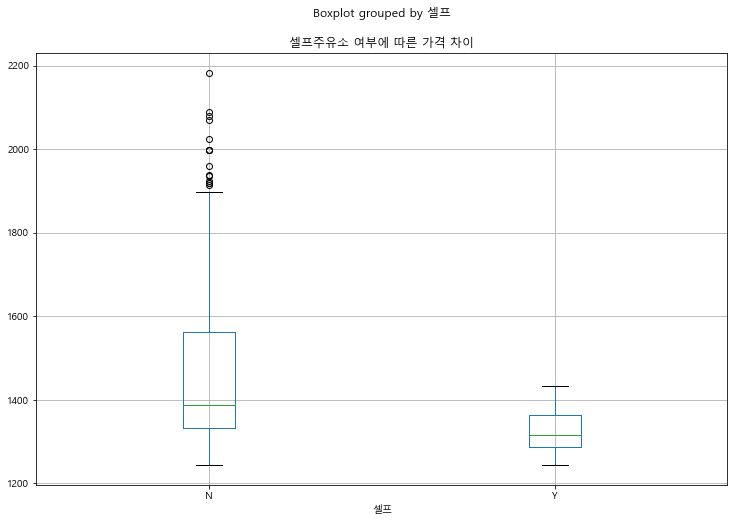

In [6]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))
plt.title('셀프주유소 여부에 따른 가격 차이')

- 셀프주유소(Y)가 비교적 가격이 낮은 것을 알 수 있음

Text(0.5, 1.0, '브랜드별 셀프 주유소 여부에 따른 차이 비교')

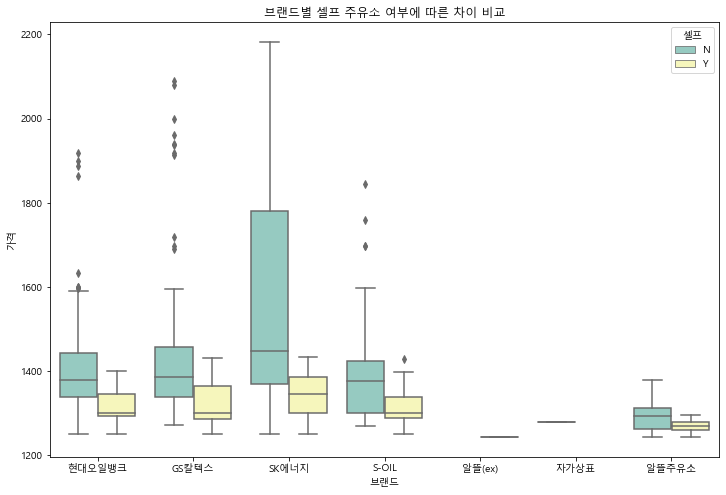

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x='브랜드',y='가격',hue='셀프',data=stations, palette='Set3')
plt.title('브랜드별 셀프 주유소 여부에 따른 차이 비교')

- 모든 브랜드에서 셀프 주유소 가격이 더 저렴함
- sk에너지, gs칼텍스의 셀프 주유소 가격이 상대적이로 높게 형성되어있음

Text(0.5, 1.0, '브랜드별 셀프 주유소 여부에 따른 차이 비교')

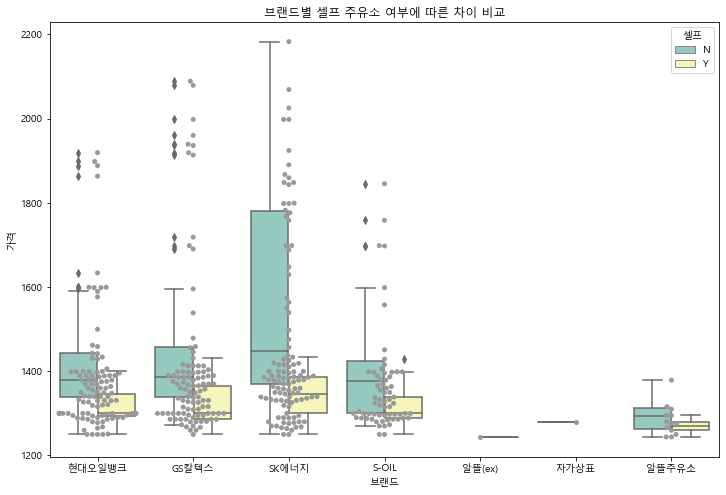

In [9]:
# Swarmplot 추가해서 같이 보기
plt.figure(figsize=(12,8))
sns.boxplot(x='브랜드',y='가격',hue='셀프',data=stations, palette='Set3')
sns.swarmplot(x='브랜드',y='가격',data=stations, color=".6")
plt.title('브랜드별 셀프 주유소 여부에 따른 차이 비교')

- sk에너지가 좀더 높은 가격대를 형성하는 주유소가 많음
- 전반적으로 현대오일뱅크, s-oil이 비교적 저렴함

# 서울시 구별 주유 가격 확인하기

In [19]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [12]:
# 가격 높은 순으로 정렬해, 가격 가장 높은 구 확인
stations.sort_values(by='가격',ascending=False).head(10)

,상호,브랜드,주소,가격,셀프,구
248,서남주유소,SK에너지,서울 중구 통일로 30,2183,N,중구
216,서계주유소,GS칼텍스,서울 용산구 청파로 367 (서계동),2089,N,용산구
247,필동주유소,GS칼텍스,서울 중구 퇴계로 196 (필동2가),2079,N,중구
246,SK에너지(주) 퇴계로주유소,SK에너지,서울 중구 퇴계로 228 (필동2가),2069,N,중구
396,뉴서울(강남),SK에너지,서울 강남구 언주로 716 (논현동),2025,N,강남구
238,(주)대양씨앤씨 사직주유소,GS칼텍스,서울 종로구 사직로 65 (사직동),1998,N,종로구
215,에너비스,SK에너지,서울 용산구 한남대로 82 (한남동),1998,N,용산구
237,(주)중앙에너비스 혜화주유소,SK에너지,서울 종로구 창경궁로35길 1,1998,N,종로구
236,경복궁주유소,GS칼텍스,서울 종로구 율곡로 6 (중학동),1960,N,종로구
193,SJ오일(주) 여의도주유소,GS칼텍스,서울 영등포구 은행로 64,1939,N,영등포구


In [13]:
# 가격 낮은 순으로 정렬해, 가격 가장 낮은 구 확인
stations.sort_values(by='가격',ascending=True).head(10)

,상호,브랜드,주소,가격,셀프,구
262,뉴신정주유소,알뜰주유소,서울 강서구 곰달래로 207(화곡동),1243,N,강서구
263,화곡역주유소,알뜰주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,강서구
63,만남의광장주유소,알뜰(ex),서울 서초구 양재대로12길 73-71,1244,Y,서초구
354,도봉제일주유소(주)송만에너지,현대오일뱅크,서울 도봉구 도봉로 783 (도봉동),1249,N,도봉구
150,현대주유소,S-OIL,서울 양천구 남부순환로 372 (신월동),1249,Y,양천구
149,가로공원주유소,SK에너지,서울 양천구 가로공원로 165 (신월동),1249,N,양천구
148,개나리Self주유소,SK에너지,서울 양천구 남부순환로 442 (신월동),1249,Y,양천구
194,북서울고속주유소,S-OIL,서울 강북구 삼양로 410 (수유동),1249,Y,강북구
195,(주)석산에너지,현대오일뱅크,서울 강북구 삼양로 316 (수유동),1249,Y,강북구
196,수유동주유소,GS칼텍스,서울 강북구 도봉로 395 (수유동),1249,Y,강북구


In [16]:
# 구별 평균 가격 확인
gu_data = stations.groupby(['구'])[['가격']].mean()
gu_data.head()

,가격
구,
강남구,1522.448276
강동구,1438.615385
강북구,1277.909091
강서구,1333.615385
관악구,1374.000000


In [20]:
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data=gu_data,
              columns=[gu_data.index,'가격'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

- 중구, 용산구, 종로구 순으로 가장 높으며, 그 다음으로 강남구도 비교적 높게 나타남

# 서울시 주유 가격 상하위 10개 주유소 지도에 표기

## 상하위 데이터 나누기

In [24]:
# 상위 10개
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,상호,브랜드,주소,가격,셀프,구
248,서남주유소,SK에너지,서울 중구 통일로 30,2183,N,중구
216,서계주유소,GS칼텍스,서울 용산구 청파로 367 (서계동),2089,N,용산구
247,필동주유소,GS칼텍스,서울 중구 퇴계로 196 (필동2가),2079,N,중구
246,SK에너지(주) 퇴계로주유소,SK에너지,서울 중구 퇴계로 228 (필동2가),2069,N,중구
396,뉴서울(강남),SK에너지,서울 강남구 언주로 716 (논현동),2025,N,강남구
238,(주)대양씨앤씨 사직주유소,GS칼텍스,서울 종로구 사직로 65 (사직동),1998,N,종로구
215,에너비스,SK에너지,서울 용산구 한남대로 82 (한남동),1998,N,용산구
237,(주)중앙에너비스 혜화주유소,SK에너지,서울 종로구 창경궁로35길 1,1998,N,종로구
236,경복궁주유소,GS칼텍스,서울 종로구 율곡로 6 (중학동),1960,N,종로구
193,SJ오일(주) 여의도주유소,GS칼텍스,서울 영등포구 은행로 64,1939,N,영등포구


In [25]:
# 하위 10개
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,상호,브랜드,주소,가격,셀프,구
262,뉴신정주유소,알뜰주유소,서울 강서구 곰달래로 207(화곡동),1243,N,강서구
263,화곡역주유소,알뜰주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,강서구
63,만남의광장주유소,알뜰(ex),서울 서초구 양재대로12길 73-71,1244,Y,서초구
354,도봉제일주유소(주)송만에너지,현대오일뱅크,서울 도봉구 도봉로 783 (도봉동),1249,N,도봉구
150,현대주유소,S-OIL,서울 양천구 남부순환로 372 (신월동),1249,Y,양천구
149,가로공원주유소,SK에너지,서울 양천구 가로공원로 165 (신월동),1249,N,양천구
148,개나리Self주유소,SK에너지,서울 양천구 남부순환로 442 (신월동),1249,Y,양천구
194,북서울고속주유소,S-OIL,서울 강북구 삼양로 410 (수유동),1249,Y,강북구
195,(주)석산에너지,현대오일뱅크,서울 강북구 삼양로 316 (수유동),1249,Y,강북구
196,수유동주유소,GS칼텍스,서울 강북구 도봉로 395 (수유동),1249,Y,강북구


## google map api로 위도 경도 얻기

In [26]:
gmap_key = '***'
gmaps = googlemaps.Client(key=gmap_key)

In [27]:
from tqdm.notebook import tqdm
import numpy as np

lat = []
lng = []

for n in tqdm(oil_price_top10.index):
    try:
        tmp_address = str(oil_price_top10['주소'][n]).split('(')[0]   # (**동) 제거
        tmp_map = gmaps.geocode(tmp_address)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')

In [29]:
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,상호,브랜드,주소,가격,셀프,구,lat,lng
248,서남주유소,SK에너지,서울 중구 통일로 30,2183,N,중구,37.558348,126.972090
216,서계주유소,GS칼텍스,서울 용산구 청파로 367 (서계동),2089,N,용산구,37.552290,126.968935
247,필동주유소,GS칼텍스,서울 중구 퇴계로 196 (필동2가),2079,N,중구,37.560850,126.993653
246,SK에너지(주) 퇴계로주유소,SK에너지,서울 중구 퇴계로 228 (필동2가),2069,N,중구,37.561648,126.997142
396,뉴서울(강남),SK에너지,서울 강남구 언주로 716 (논현동),2025,N,강남구,37.517636,127.035756
238,(주)대양씨앤씨 사직주유소,GS칼텍스,서울 종로구 사직로 65 (사직동),1998,N,종로구,37.574464,126.966618
215,에너비스,SK에너지,서울 용산구 한남대로 82 (한남동),1998,N,용산구,37.535952,127.006130
237,(주)중앙에너비스 혜화주유소,SK에너지,서울 종로구 창경궁로35길 1,1998,N,종로구,37.586068,127.001058
236,경복궁주유소,GS칼텍스,서울 종로구 율곡로 6 (중학동),1960,N,종로구,37.575416,126.980132
193,SJ오일(주) 여의도주유소,GS칼텍스,서울 영등포구 은행로 64,1939,N,영등포구,37.530338,126.925579


In [30]:
lat = []
lng = []

for n in tqdm(oil_price_bottom10.index):
    try:
        tmp_address = str(oil_price_bottom10['주소'][n]).split('(')[0]   # (**동) 제거
        tmp_map = gmaps.geocode(tmp_address)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')

In [31]:
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,상호,브랜드,주소,가격,셀프,구,lat,lng
262,뉴신정주유소,알뜰주유소,서울 강서구 곰달래로 207(화곡동),1243,N,강서구,37.531554,126.856024
263,화곡역주유소,알뜰주유소,서울특별시 강서구 강서로 154 (화곡동),1243,Y,강서구,37.540657,126.841506
63,만남의광장주유소,알뜰(ex),서울 서초구 양재대로12길 73-71,1244,Y,서초구,37.459906,127.042060
354,도봉제일주유소(주)송만에너지,현대오일뱅크,서울 도봉구 도봉로 783 (도봉동),1249,N,도봉구,37.674434,127.044051
150,현대주유소,S-OIL,서울 양천구 남부순환로 372 (신월동),1249,Y,양천구,37.533811,126.829240
149,가로공원주유소,SK에너지,서울 양천구 가로공원로 165 (신월동),1249,N,양천구,37.536940,126.834278
148,개나리Self주유소,SK에너지,서울 양천구 남부순환로 442 (신월동),1249,Y,양천구,37.528087,126.832981
194,북서울고속주유소,S-OIL,서울 강북구 삼양로 410 (수유동),1249,Y,강북구,37.640155,127.017203
195,(주)석산에너지,현대오일뱅크,서울 강북구 삼양로 316 (수유동),1249,Y,강북구,37.631582,127.017939
196,수유동주유소,GS칼텍스,서울 강북구 도봉로 395 (수유동),1249,Y,강북구,37.642140,127.029568


In [32]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                            radius=15, color='#CD3181',fill_color='#CD3181').add_to(map)

    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
            folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]], 
                                radius=15, color='#3186cc',fill_color='#3186cc').add_to(map)
map

- 중구, 종로구에 비싼 주유소가 비교적 몰려있고
- 강북구, 강서구, 은평구에 저렴한 주유소가 몰려있음